<a href="https://colab.research.google.com/github/joycelim98/DSA4212/blob/master/assignment_1_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>DSA 4212: Year 2019-2020</center></h1>
<h3><center> Assignment 1 (Deadline: 27 March 2020 at 23:59) </center></h3>
<h3><center> To Be submitted on the lumiNUS )</center></h3>
<h2><center> Group Number: ???? </center></h2>
<h2><center> Group Member 1: Student Name, Student ID </center></h2>
<h2><center> Group Member 2: Student Name, Student ID </center></h2>
<h2><center> Group Member 3: Student Name, Student ID </center></h2>



In [0]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) 

import jax
import jax.numpy as np

import pylab as plt
import imageio
import os
import numpy as onp
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd



# Data Dowload
1. Download the "celeba_small.zip" file available on lumiNUS.
This is a 146Mo large zip-file containing 20K face images.
2. Download the attribute file "celeba.csv" available on lumiNUS.
3. Unzip the file "celeba_small.zip" in the directory of your choice. (Data = 175 Mo when uncompressed). 


# Brief Data exploration

In [0]:
#load attributes csv file
path_csv  = "/Users/alex/Dataset/celebA/"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))


NameError: ignored

In [0]:
#"attribute" is a dictionary containing several attributes for each image
attribute.keys()

Index(['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [0]:
#let us list all the files in the image directory
path = "/Users/alex/Dataset/celebA/img_celeba_small"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


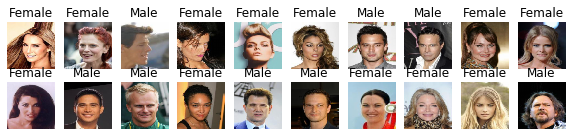

In [0]:
#let us display the first 20 images
plt.figure(figsize=(10,2))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display
    im = resize(im, (100,100) )
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")
    

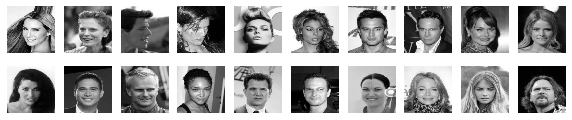

In [0]:
#let us display the first 20 images in black and white
plt.figure(figsize=(10,2))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100
    im = resize(im, (100,100) )
    #transform to black and white by averaging the 3 color channels
    im = onp.mean(im, axis=2)
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255., cmap="gray")
    plt.axis("off")

In [0]:
#let us load the first 500 images
n_img = 1000
img_array = onp.zeros((n_img, 100,100))
for k in range(n_img):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = onp.mean(im, axis=2)
    img_array[k,:,:] = im

Text(0.5, 1.0, 'Avg(Low_Cheek)')

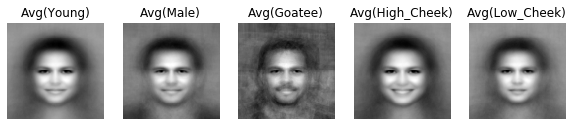

In [0]:
#let us plot a few "average" faces
plt.figure(figsize=(10,10))

plt.subplot(2,5,1)
is_young = attribute["Young"][:n_img]==1
plt.imshow(onp.mean(img_array[is_young,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Young)")

plt.subplot(2,5,2)
is_male = attribute["Male"][:n_img]==1
plt.imshow(onp.mean(img_array[is_male,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Male)")


plt.subplot(2,5,3)
is_Goatee = attribute["Goatee"][:n_img]==1
plt.imshow(onp.mean(img_array[is_Goatee,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Goatee)")


plt.subplot(2,5,4)
is_High_Cheekbones = attribute["High_Cheekbones"][:n_img]==1
plt.imshow(onp.mean(img_array[is_High_Cheekbones,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(High_Cheek)")


plt.subplot(2,5,5)
is_Low_Cheekbones = attribute["High_Cheekbones"][:n_img]==-1
plt.imshow(onp.mean(img_array[is_Low_Cheekbones,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Low_Cheek)")


In [0]:
print("Proportion of Young people in the dataset:", np.mean(attribute["Young"]==1) )

Proportion of Young people in the dataset: 0.7799


# Assignment

Your assignment consists in building an algorithm that can automatically tell whether an image corresponds to a young person or not. 

1. You are only allowed to use a logistic regression model (possibly with regularization). 
2. You can only use the first 15,000 images to train you model. The accuracy of your model will be evaluated on the last 5,000 images.
3. You are allowed to use whatever optimization algorithm you think is most efficient.
4. You are allowed to do whatever pre-processing you deem appropriate.
5. You will report the accuracy (i.e. th percentage of correctly classified) on the test dataset (i.e. the last 5,000 images). 
6. You will as well report the Area Under the Curve (AUC) of your classifier on the test dataset.

### Some remarks:
1. You can work with colored, or grayscale images.
2. You can rescale the images to whatever resolution you think is best/efficient
3. It is usually a good idea to rescale the pixel intensity in between 0 and 1
4. If you fit a logistic regression in dimension $D$, with each coordinate roughly in between 0 and 1, it is usually a good idea to start with a random $\beta$ with mean 0 (or 0.5), and standard deviation $1/\sqrt{D}$ for each coordinate.
5. It may be a good (or bad?) idea to increase/lower the contrast of the image. 
6. It may be a good (or bad?) idea to only consider a smaller parts of the image (eg. only the parts near the eye?) -- some parts of the image may be irrelevant.
7. Sometimes it can be a good idea to randomly add noise, or randomly add some variations to the images. (keyword: data-augmentation)
8. It can be a good idea to quickly explore different approaches on a subset of the dataset, and maybe at a lower resolution (to make the algorithm converge faster)
9. The dataset is imbalanced -- there are 78% of "Young" people in the dataset. It is sometimes a good idea to consider a balanced subset of the dataset to fit your algorithm.
10. Makes absolutely sure that you do not use the test dataset (i.e. the last 5,000 images) to train your algorithm.

### Last Remark:
It is absolutely crucial that your report is readable and well presented. The point of this assignment is not to show me that you know how to re-implement all the things we've done in class. The point of this assignment is to get the job done, as simply, robustly and efficiently as possible.